<a href="https://colab.research.google.com/github/innovinitylabs/learning-pytorch/blob/main/01_pytorch_workflow_codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.1.0'

# device agnostic code

In [26]:
device = 'mps' if torch.backends.mps.is_available() else ('cuda' if torch.cuda.is_available() else 'cpu')
device # Mps = metal performance shaders on Apple M1 chip

'mps'

In [27]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3

start = 0 
end = 1 
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)

X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [28]:
y = weight * X + bias

In [29]:
split_train = int(0.8 * len(X))

X_train, y_train = X[:split_train], y[:split_train]
X_test, y_test = X[split_train:], y[split_train:]

In [30]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [31]:
X_test[:5], y_test[:5]

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160]]))

plotting data

In [32]:
def plot_it(X_train=X_train, y_train=y_train,
            X_test=X_test, y_test=y_test,
            y_pred=None):
    plt.figure(figsize=(10,7))

    plt.scatter(X_train, y_train, s=4, c='g', label='Train Data')

    plt.scatter(X_test, y_test, s=10, c='y', label='Test Data')



    if y_pred is not None:
        plt.scatter(X_test, y_pred, s=2, c='r', label='Predictions')

    plt.legend(prop={'size': 11})

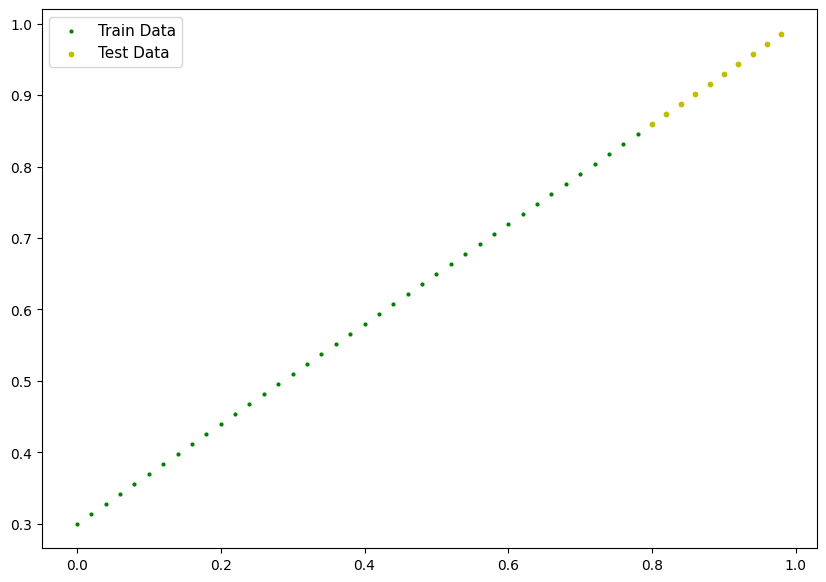

In [33]:
plot_it()

creating model

In [34]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.linearlayer = nn.Linear(in_features=1,
                                     out_features=1)

    def forward(self, x):
        return self.linearlayer(x)

In [35]:
torch.manual_seed = 42

model = LinearRegression()

In [36]:
model

LinearRegression(
  (linearlayer): Linear(in_features=1, out_features=1, bias=True)
)

In [37]:
list(model.parameters())

[Parameter containing:
 tensor([[0.8750]], requires_grad=True),
 Parameter containing:
 tensor([-0.2263], requires_grad=True)]

In [38]:
model.state_dict()

OrderedDict([('linearlayer.weight', tensor([[0.8750]])),
             ('linearlayer.bias', tensor([-0.2263]))])

moving model to device (MPS on my local machine)

In [39]:
device

'mps'

In [40]:
model.to(device)

LinearRegression(
  (linearlayer): Linear(in_features=1, out_features=1, bias=True)
)

In [41]:
next(model.parameters()).device #model is a generator, only parameters has .device method

device(type='mps', index=0)

In [42]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

Choosing Loss function and optimizer

In [43]:
loss_fn = nn.L1Loss()

opt = torch.optim.SGD(params=model.parameters(), lr=0.01)

Create training Loop

In [44]:
epochs = 800

In [45]:
torch.manual_seed = 42

epoch_num = [ ]
train_loss_values = [ ]
test_loss_values = [ ]


for epoch in range(epochs):

    # Training

    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    opt.zero_grad()

    loss.backward()

    opt.step()

    # Testing

    model.eval()

    with torch.inference_mode():

        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch%100 == 0:
        epoch_num.append(epoch)
        test_loss_values.append(test_loss.cpu().detach())
        train_loss_values.append(loss.cpu().detach())

        print(f'epoch: {epoch}, loss: {loss}, test loss: {test_loss}')

epoch: 0, loss: 0.4580039978027344, test loss: 0.35702821612358093


epoch: 100, loss: 0.043390899896621704, test loss: 0.10090559720993042
epoch: 200, loss: 0.00904831849038601, test loss: 0.020241200923919678
epoch: 300, loss: 0.007257809396833181, test loss: 0.008137029595673084
epoch: 400, loss: 0.007257809396833181, test loss: 0.008137029595673084
epoch: 500, loss: 0.007257809396833181, test loss: 0.008137029595673084
epoch: 600, loss: 0.007257809396833181, test loss: 0.008137029595673084
epoch: 700, loss: 0.007257809396833181, test loss: 0.008137029595673084


predicting using the model

In [46]:
with torch.inference_mode():
        pred = model(X_test)       


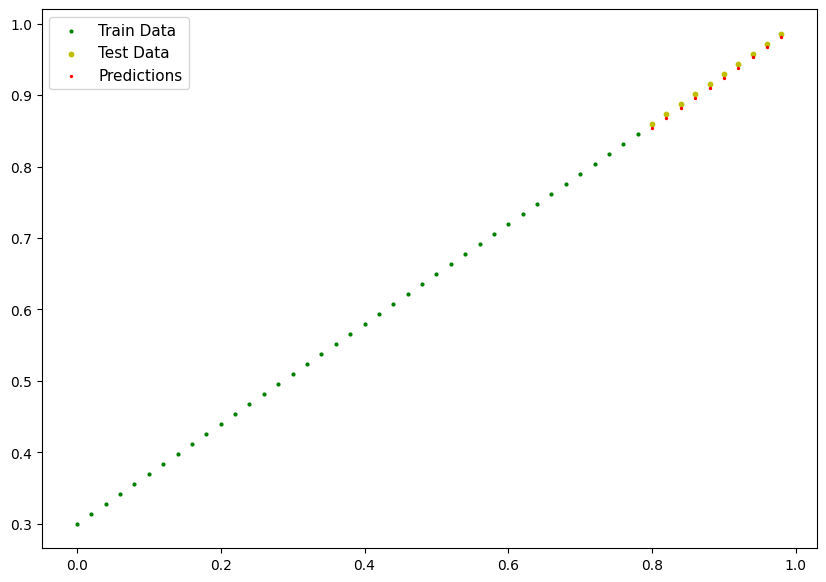

In [47]:
plot_it(y_pred = pred.cpu())

plotting the loss curve

Text(0, 0.5, 'Loss')

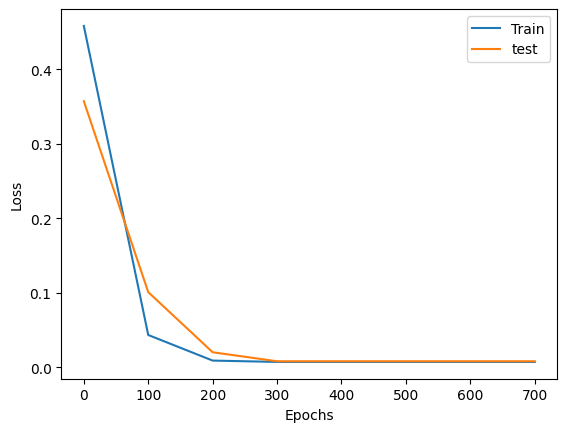

In [48]:
plt.plot(epoch_num, train_loss_values, label= 'Train')
plt.plot(epoch_num, test_loss_values, label= 'test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

# nice

# saving tensor